# ***IMPORT LIBRARY***

In [ ]:
import requests
import pandas as pd
import numpy as np
from math import sqrt

from scipy import sparse
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ***DATASET***



*Dataset* dapat diakses pada tautan berikut ini.

*   https://www.kaggle.com/datasets/irkaal/foodcom-recipes-and-reviews/


Kami juga meng-*upload* pada *drive* berikut ini.

*   https://drive.google.com/drive/folders/1rk0ut3roLQt9BVSHt1a9IX3hxmxp6qZg?usp=sharing


##*Dataset Reviews*

In [ ]:
# Load dataset
reviews = pd.read_csv("/content/drive/MyDrive/MK SISTEM REKOMENDASI/Tugas Besar Sistem Rekomendasi/reviews.csv")
reviews

,ReviewId,RecipeId,AuthorId,AuthorName,Rating,Review,DateSubmitted,DateModified
0,2,992,2008,gayg msft,5,better than any you can get at a restaurant!,2000-01-25T21:44:00Z,2000-01-25T21:44:00Z
1,7,4384,1634,Bill Hilbrich,4,"I cut back on the mayo, and made up the differ...",2001-10-17T16:49:59Z,2001-10-17T16:49:59Z
2,9,4523,2046,Gay Gilmore ckpt,2,i think i did something wrong because i could ...,2000-02-25T09:00:00Z,2000-02-25T09:00:00Z
3,13,7435,1773,Malarkey Test,5,easily the best i have ever had. juicy flavor...,2000-03-13T21:15:00Z,2000-03-13T21:15:00Z
4,14,44,2085,Tony Small,5,An excellent dish.,2000-03-28T12:51:00Z,2000-03-28T12:51:00Z
...,...,...,...,...,...,...,...,...
1401977,2090339,139499,2002080368,terrylbiggs,2,I was disappointed. I couldn't wait to make th...,2020-12-27T23:57:54Z,2020-12-27T23:57:54Z
1401978,2090340,148484,41805321,rogerberry,5,Nothing to drain. And I don’t heat up the liqu...,2020-12-28T00:44:42Z,2020-12-28T00:44:42Z
1401979,2090341,264191,2002901848,Reiketsukan 6.,5,Good base recipe for someone to start with. I ...,2020-12-28T01:04:43Z,2020-12-28T01:04:43Z
1401980,2090345,411791,2002901938,Sue M.,5,Thank you so much for this amazing recipe! I l...,2020-12-28T03:07:10Z,2020-12-28T03:07:10Z


##*Dataset Recipes*

In [ ]:
# Load dataset
recipes = pd.read_csv("/content/drive/MyDrive/MK SISTEM REKOMENDASI/Tugas Besar Sistem Rekomendasi/recipes.csv")
recipes

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,NaN,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",...,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,NaN,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,NaN,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",...,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,NaN,"c(""Mix everything together and bring to a boil..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522512,541379,Meg's Fresh Ginger Gingerbread,2002090414,rdsxc,PT35M,PT1H,PT1H35M,2020-12-22T15:27:00Z,Make and share this Meg's Fresh Ginger Gingerb...,character(0),...,7.6,54.4,278.2,48.5,0.8,22.8,3.9,8.0,1 8x8 cake pan,"c(""Preheat oven to 350&deg;F Grease an 8x8 cak..."
522513,541380,Roast Prime Rib au Poivre with Mixed Peppercorns,211566,Denver cooks,PT3H,PT30M,PT3H30M,2020-12-22T15:32:00Z,"White, black, green, and pink peppercorns add ...","""https://img.sndimg.com/food/image/upload/w_55...",...,71.4,433.8,766.3,3.2,0.7,0.1,117.0,8.0,1 Roast,"c(""Position rack in center of oven and preheat..."
522514,541381,Kirshwasser Ice Cream,2001131545,Jonathan F.,PT3H,PT1H,PT4H,2020-12-22T15:33:00Z,Make and share this Kirshwasser Ice Cream reci...,character(0),...,72.6,470.9,192.5,33.9,0.0,17.3,12.8,6.0,NaN,"c(""heat half and half and heavy cream to a sim..."
522515,541382,Quick & Easy Asian Cucumber Salmon Rolls,2001004241,CLUBFOODY,NaN,PT15M,PT15M,2020-12-22T22:11:00Z,"Extremely quick and easy to make, these are gr...","""https://img.sndimg.com/food/image/upload/w_55...",...,0.1,2.9,100.5,0.3,0.0,0.1,2.4,NaN,20 rolls,"c(""In a small bowl, combine mayo and wasabi pa..."


# ***PRE-PROCESSING***

##*Filter* Kolom *Date Submitted*


Melakukan pemisahan (*filter*) berdasarkan waktu rentang 26-01-2000 s.d. 31-12-2001 pada kolom *Date Submitted*.

In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401982 entries, 0 to 1401981
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   ReviewId       1401982 non-null  int64 
 1   RecipeId       1401982 non-null  int64 
 2   AuthorId       1401982 non-null  int64 
 3   AuthorName     1401982 non-null  object
 4   Rating         1401982 non-null  int64 
 5   Review         1401768 non-null  object
 6   DateSubmitted  1401982 non-null  object
 7   DateModified   1401982 non-null  object
dtypes: int64(4), object(4)
memory usage: 85.6+ MB


In [ ]:
# Mengubah kolom DateSubmitted menjadi tipe data datetime agar dapat melakukan filter berdasarkan waktu
reviews['DateSubmitted'] = pd.to_datetime(reviews['DateSubmitted'])
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401982 entries, 0 to 1401981
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype              
---  ------         --------------    -----              
 0   ReviewId       1401982 non-null  int64              
 1   RecipeId       1401982 non-null  int64              
 2   AuthorId       1401982 non-null  int64              
 3   AuthorName     1401982 non-null  object             
 4   Rating         1401982 non-null  int64              
 5   Review         1401768 non-null  object             
 6   DateSubmitted  1401982 non-null  datetime64[ns, UTC]
 7   DateModified   1401982 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(4), object(3)
memory usage: 85.6+ MB


In [ ]:
# Melakukan filter
start_date = '2000-01-26'
end_date = '2001-12-31'
reviews = reviews[(reviews['DateSubmitted'] >= start_date) & (reviews['DateSubmitted'] <= end_date)]

reviews

,ReviewId,RecipeId,AuthorId,AuthorName,Rating,Review,DateSubmitted,DateModified
1,7,4384,1634,Bill Hilbrich,4,"I cut back on the mayo, and made up the differ...",2001-10-17 16:49:59+00:00,2001-10-17T16:49:59Z
2,9,4523,2046,Gay Gilmore ckpt,2,i think i did something wrong because i could ...,2000-02-25 09:00:00+00:00,2000-02-25T09:00:00Z
3,13,7435,1773,Malarkey Test,5,easily the best i have ever had. juicy flavor...,2000-03-13 21:15:00+00:00,2000-03-13T21:15:00Z
4,14,44,2085,Tony Small,5,An excellent dish.,2000-03-28 12:51:00+00:00,2000-03-28T12:51:00Z
5,17,5221,2046,Gay Gilmore ckpt,4,"love it, but without the bean sprouts.",2000-05-08 11:08:00+00:00,2000-05-08T11:08:00Z
...,...,...,...,...,...,...,...,...
1244723,1429155,10125,21656,Carol,5,WOW! These cookies are without a doubt the bes...,2001-11-22 10:48:19+00:00,2001-11-22T10:48:19Z
1244727,1429159,10125,16827,Ellen Brody,5,These were really easy to make and are very so...,2001-12-08 05:25:34+00:00,2001-12-08T05:25:34Z
1244731,1429163,10125,5076,selvi nadarajah,5,"thanks Dawn,\r\nthis was superb.I made it for ...",2001-11-14 09:37:41+00:00,2001-11-14T09:37:41Z
1244738,1429170,10125,21267,Usako Yamakawa,2,"Maybe I did something wrong, or maybe I was ex...",2001-12-22 16:17:03+00:00,2001-12-22T16:17:03Z


##*Missing Values*

In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4010 entries, 1 to 1244739
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   ReviewId       4010 non-null   int64              
 1   RecipeId       4010 non-null   int64              
 2   AuthorId       4010 non-null   int64              
 3   AuthorName     4010 non-null   object             
 4   Rating         4010 non-null   int64              
 5   Review         4010 non-null   object             
 6   DateSubmitted  4010 non-null   datetime64[ns, UTC]
 7   DateModified   4010 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(4), object(3)
memory usage: 282.0+ KB


In [ ]:
print('Total missing value in "reviews" dataset:', reviews.isnull().sum().sum(), 'records')

Total missing value in "reviews" dataset: 0 records


In [ ]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522517 entries, 0 to 522516
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RecipeId                    522517 non-null  int64  
 1   Name                        522517 non-null  object 
 2   AuthorId                    522517 non-null  int64  
 3   AuthorName                  522517 non-null  object 
 4   CookTime                    439972 non-null  object 
 5   PrepTime                    522517 non-null  object 
 6   TotalTime                   522517 non-null  object 
 7   DatePublished               522517 non-null  object 
 8   Description                 522512 non-null  object 
 9   Images                      522516 non-null  object 
 10  RecipeCategory              521766 non-null  object 
 11  Keywords                    505280 non-null  object 
 12  RecipeIngredientQuantities  522514 non-null  object 
 13  RecipeIngredie

In [ ]:
print('Total missing value in "recipes" dataset:', recipes.isnull().sum().sum(), 'records')

Total missing value in "recipes" dataset: 1132236 records


In [ ]:
col_with_missing = [col for col in recipes.columns if recipes[col].isnull().any()]
print('Column with missing value:', col_with_missing)

Column with missing value: ['CookTime', 'Description', 'Images', 'RecipeCategory', 'Keywords', 'RecipeIngredientQuantities', 'AggregatedRating', 'ReviewCount', 'RecipeServings', 'RecipeYield']


##Mengambil Kolom yang Digunakan


Menghapus Kolom yang tidak diperlukan.
Kolom yang akan digunakan pada *dataset reviews* adalah:

*   RecipeId
*   AuthorId
*   Rating

Kolom yang akan digunakan pada *dataset recipes* adalah:

*   RecipeId
*   Name
*   AuthorId
*   AuthorName
*   Description
*   RecipeCategory
*   Keywords
*   RecipeIngredientParts

In [ ]:
# Membuat DataFrame
df_reviews = pd.DataFrame(reviews, columns=["AuthorId", "RecipeId", "Rating"])
df_reviews

,AuthorId,RecipeId,Rating
1,1634,4384,4
2,2046,4523,2
3,1773,7435,5
4,2085,44,5
5,2046,5221,4
...,...,...,...
1244723,21656,10125,5
1244727,16827,10125,5
1244731,5076,10125,5
1244738,21267,10125,2


In [ ]:
df_reviews.to_csv("/content/drive/MyDrive/MK SISTEM REKOMENDASI/Tugas Besar Sistem Rekomendasi/Dataset Reviews Final.csv")

In [ ]:
# Membuat DataFrame
df_recipes = pd.DataFrame(recipes, columns=["RecipeId", "Name", "AuthorId", "AuthorName", "Description", "RecipeCategory", "Keywords", "RecipeIngredientParts"])
df_recipes

,RecipeId,Name,AuthorId,AuthorName,Description,RecipeCategory,Keywords,RecipeIngredientParts
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,Make and share this Low-Fat Berry Blue Frozen ...,Frozen Desserts,"c(""Dessert"", ""Low Protein"", ""Low Cholesterol"",...","c(""blueberries"", ""granulated sugar"", ""vanilla ..."
1,39,Biryani,1567,elly9812,Make and share this Biryani recipe from Food.com.,Chicken Breast,"c(""Chicken Thigh & Leg"", ""Chicken"", ""Poultry"",...","c(""saffron"", ""milk"", ""hot green chili peppers""..."
2,40,Best Lemonade,1566,Stephen Little,This is from one of my first Good House Keepi...,Beverages,"c(""Low Protein"", ""Low Cholesterol"", ""Healthy"",...","c(""sugar"", ""lemons, rind of"", ""lemon, zest of""..."
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,This dish is best prepared a day in advance to...,Soy/Tofu,"c(""Beans"", ""Vegetable"", ""Low Cholesterol"", ""We...","c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""..."
4,42,Cabbage Soup,1538,Duckie067,Make and share this Cabbage Soup recipe from F...,Vegetable,"c(""Low Protein"", ""Vegan"", ""Low Cholesterol"", ""...","c(""plain tomato juice"", ""cabbage"", ""onion"", ""c..."
...,...,...,...,...,...,...,...,...
522512,541379,Meg's Fresh Ginger Gingerbread,2002090414,rdsxc,Make and share this Meg's Fresh Ginger Gingerb...,Dessert,"""< 4 Hours""","c(""fresh ginger"", ""unsalted butter"", ""dark bro..."
522513,541380,Roast Prime Rib au Poivre with Mixed Peppercorns,211566,Denver cooks,"White, black, green, and pink peppercorns add ...",Very Low Carbs,"c(""High Protein"", ""High In..."", ""< 4 Hours"")","c(""Dijon mustard"", ""garlic"", ""peppercorns"", ""s..."
522514,541381,Kirshwasser Ice Cream,2001131545,Jonathan F.,Make and share this Kirshwasser Ice Cream reci...,Ice Cream,"c(""Dessert"", ""< 4 Hours"")","c(""half-and-half"", ""heavy cream"", ""brandy"", ""s..."
522515,541382,Quick & Easy Asian Cucumber Salmon Rolls,2001004241,CLUBFOODY,"Extremely quick and easy to make, these are gr...",Canadian,"c(""< 15 Mins"", ""Easy"")","c(""wasabi paste"", ""dill"", ""English cucumber"", ..."


##*Drop Missing Values*


In [ ]:
print('Total missing value in "df_recipes" dataset:', df_recipes.isnull().sum().sum(), 'records')

Total missing value in "df_recipes" dataset: 17993 records


In [ ]:
missing_values_per_column = df_recipes.isnull().sum()
rows_with_missing_values = df_recipes[df_recipes.isnull().any(axis=1)]

print("Total missing values per column:")
print(missing_values_per_column)

print("\nRows with missing values:")
print(rows_with_missing_values)

Total missing values per column:
RecipeId                     0
Name                         0
AuthorId                     0
AuthorName                   0
Description                  5
RecipeCategory             751
Keywords                 17237
RecipeIngredientParts        0
dtype: int64

Rows with missing values:
        RecipeId                                Name    AuthorId  \
25            63            Cabbage and Sausage Soup        1544   
188          240            Chicken Fried Brown Rice        1572   
198          252               Sorrel Tarragon Sauce        1554   
493          580               Garlic Mushroom Sauce        1543   
591          680  Creamy Smoked Salmon & Dijon Pasta        1556   
...          ...                                 ...         ...   
522467    541334              Easy Tater Tot Hotdish      274666   
522470    541337        Firehouse Favorite Casserole  2001361961   
522476    541343                 Shrimp Cocktail Bar  2001112113   

In [ ]:
print("=== Removing Rows with Missing Values ===")
print("Before:", df_recipes.shape)

df_recipes = df_recipes.dropna()
print("After :", df_recipes.shape)

=== Removing Rows with Missing Values ===
Before: (522517, 8)
After : (505275, 8)


In [ ]:
df_recipes.to_csv("/content/drive/MyDrive/MK SISTEM REKOMENDASI/Tugas Besar Sistem Rekomendasi/Dataset Recipes Final.csv")

# ***FINAL DATASET***

In [ ]:
df_reviews

,AuthorId,RecipeId,Rating,Review
1,1634,4384,4,"I cut back on the mayo, and made up the differ..."
2,2046,4523,2,i think i did something wrong because i could ...
3,1773,7435,5,easily the best i have ever had. juicy flavor...
4,2085,44,5,An excellent dish.
5,2046,5221,4,"love it, but without the bean sprouts."
...,...,...,...,...
1244723,21656,10125,5,WOW! These cookies are without a doubt the bes...
1244727,16827,10125,5,These were really easy to make and are very so...
1244731,5076,10125,5,"thanks Dawn,\r\nthis was superb.I made it for ..."
1244738,21267,10125,2,"Maybe I did something wrong, or maybe I was ex..."


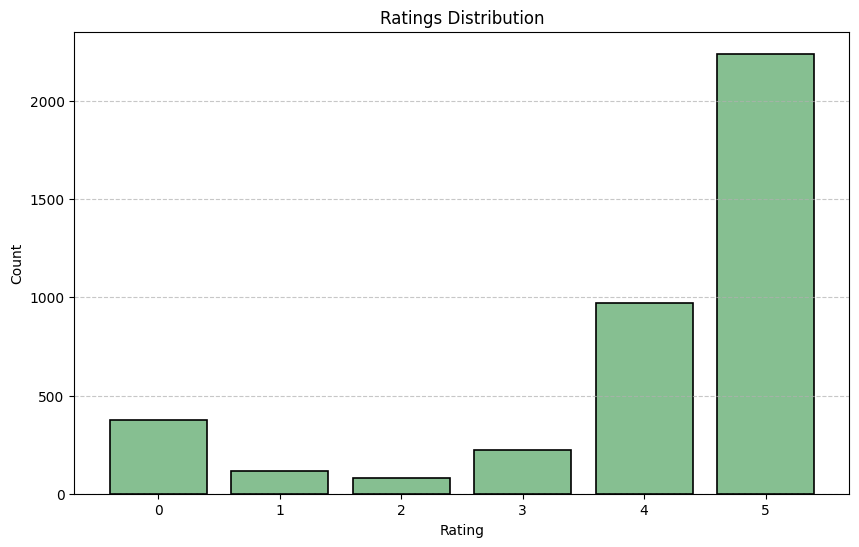

In [ ]:
# Menghitung distribusi rating
rating_distribution = df_reviews['Rating'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(rating_distribution.index, rating_distribution.values, color='#86bf91', edgecolor='black', linewidth=1.2)

plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Ratings Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
count = (df_reviews['Rating'] <= 5).sum()
print('Number of Items that have been rated: ', count)

Number of Items that have been rated:  4010


In [ ]:
count0 = (df_reviews['Rating'] == 0).sum()
count1 = (df_reviews['Rating'] == 1).sum()
count2 = (df_reviews['Rating'] == 2).sum()
count3 = (df_reviews['Rating'] == 3).sum()
count4 = (df_reviews['Rating'] == 4).sum()
count5 = (df_reviews['Rating'] == 5).sum()

print('Number of 0 in Column Rating: ', count0)
print('Number of 1 in Column Rating: ', count1)
print('Number of 2 in Column Rating: ', count2)
print('Number of 3 in Column Rating: ', count3)
print('Number of 4 in Column Rating: ', count4)
print('Number of 5 in Column Rating: ', count5)

Number of 0 in Column Rating:  376
Number of 1 in Column Rating:  115
Number of 2 in Column Rating:  81
Number of 3 in Column Rating:  225
Number of 4 in Column Rating:  972
Number of 5 in Column Rating:  2241


In [ ]:
df_recipes

,RecipeId,Name,AuthorId,AuthorName,Description,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,Make and share this Low-Fat Berry Blue Frozen ...,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,1567,elly9812,Make and share this Biryani recipe from Food.com.,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,1566,Stephen Little,This is from one of my first Good House Keepi...,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,This dish is best prepared a day in advance to...,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,1538,Duckie067,Make and share this Cabbage Soup recipe from F...,"c(""Mix everything together and bring to a boil..."
...,...,...,...,...,...,...
522512,541379,Meg's Fresh Ginger Gingerbread,2002090414,rdsxc,Make and share this Meg's Fresh Ginger Gingerb...,"c(""Preheat oven to 350&deg;F Grease an 8x8 cak..."
522513,541380,Roast Prime Rib au Poivre with Mixed Peppercorns,211566,Denver cooks,"White, black, green, and pink peppercorns add ...","c(""Position rack in center of oven and preheat..."
522514,541381,Kirshwasser Ice Cream,2001131545,Jonathan F.,Make and share this Kirshwasser Ice Cream reci...,"c(""heat half and half and heavy cream to a sim..."
522515,541382,Quick & Easy Asian Cucumber Salmon Rolls,2001004241,CLUBFOODY,"Extremely quick and easy to make, these are gr...","c(""In a small bowl, combine mayo and wasabi pa..."


##Dataset Matriks Rating menggunakan Pivot Table

In [ ]:
matriks = df_reviews.copy()

# Menggunakan pivot untuk mengubah df menjadi matriks
df_matriks = matriks.pivot(index='AuthorId', columns='RecipeId', values='Rating')
df_matriks

RecipeId,44,62,67,72,83,100,102,104,112,113,...,52727,54484,55028,64306,64327,70137,109055,161382,161399,161409
AuthorId,,,,,,,,,,,,,,,,,,,,,
1566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_matriks.isna().sum()

RecipeId
44        1816
62        1819
67        1820
72        1820
83        1818
          ... 
70137     1817
109055    1820
161382    1820
161399    1820
161409    1820
Length: 2517, dtype: int64

In [ ]:
df_matriks.fillna(0, inplace=True)
df_matriks

RecipeId,44,62,67,72,83,100,102,104,112,113,...,52727,54484,55028,64306,64327,70137,109055,161382,161399,161409
AuthorId,,,,,,,,,,,,,,,,,,,,,
1566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1634,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##Data Sparsity

In [ ]:
jumlah_nilai_nol = (df_matriks == 0).sum().sum()
jumlah_total = df_matriks.size
persentase_sparsity = (jumlah_nilai_nol / jumlah_total) * 100

print(f"Jumlah nilai 0 dalam dataset: {jumlah_nilai_nol}")
print(f"Jumlah keseluruhan dataset  : {jumlah_total}")
print("=====================================")
print(f"Persentase sparsity         : {persentase_sparsity:.2f}%")

Jumlah nilai 0 dalam dataset: 4579823
Jumlah keseluruhan dataset  : 4583457
Persentase sparsity         : 99.92%


In [ ]:
df_matriks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1821 entries, 1566 to 42189
Columns: 2517 entries, 44 to 161409
dtypes: float64(2517)
memory usage: 35.0 MB


# ***MOST POPULAR ITEM***

In [ ]:
most_popular_items = df_reviews['RecipeId'].value_counts().head(30)
most_popular_items

9272     29
12522    24
8701     16
8468     15
8554     15
8594     15
8579     14
5466     13
8486     12
2886     11
10125    11
8534     11
10205    10
9370      9
7435      9
3596      9
4296      9
9836      9
9012      9
10422     8
10507     8
9064      8
5365      8
9808      8
8592      7
9015      7
8999      7
11181     7
13307     7
8665      7
Name: RecipeId, dtype: int64

In [ ]:
# Mengambil indeks dari 30 item paling populer
top30 = most_popular_items.index
top30_popular = df_reviews.loc[df_reviews['RecipeId'].isin(top30)]
top30_popular = top30_popular.drop_duplicates(subset='RecipeId')
top30_popular = top30_popular.sort_values(by='RecipeId', key=lambda x: x.map(most_popular_items))
# top30_popular.to_excel("/content/drive/MyDrive/MK SISTEM REKOMENDASI/Tugas Besar Sistem Rekomendasi/Most Popular Item Result.xlsx", index=False)

# **SURPRISE LAB**



In [ ]:
pip install scikit-surprise

In [ ]:
# Import library Surprise
from surprise import Dataset, NormalPredictor, Reader
from surprise.model_selection import cross_validate, KFold
from surprise import accuracy
from surprise import KNNBasic
from sklearn.model_selection import train_test_split, GridSearchCV
from surprise.accuracy import rmse, mae

# **COLLABORATIVE FILTERING**

In [ ]:
df_reviews

,AuthorId,RecipeId,Rating,Review
1,1634,4384,4,"I cut back on the mayo, and made up the differ..."
2,2046,4523,2,i think i did something wrong because i could ...
3,1773,7435,5,easily the best i have ever had. juicy flavor...
4,2085,44,5,An excellent dish.
5,2046,5221,4,"love it, but without the bean sprouts."
...,...,...,...,...
1244723,21656,10125,5,WOW! These cookies are without a doubt the bes...
1244727,16827,10125,5,These were really easy to make and are very so...
1244731,5076,10125,5,"thanks Dawn,\r\nthis was superb.I made it for ..."
1244738,21267,10125,2,"Maybe I did something wrong, or maybe I was ex..."


In [ ]:
n_users = df_reviews['AuthorId'].nunique()
n_recipes = df_reviews['RecipeId'].nunique()

In [ ]:
print(f"Total User (Author): {n_users}")

Total User (Author): 1821


In [ ]:
print(f"Total Item (Recipe): {n_recipes}")

Total Item (Recipe): 2517


## Singular Value Decomposition



In [ ]:
from surprise import SVD
from surprise.model_selection import train_test_split

In [ ]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_reviews[['AuthorId', 'RecipeId', 'Rating']], reader)

# Parameter SVD
n_latent_factors = 5
learning_rate = 0.01
n_iterations = 100

# Split data
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# SVD model
n_latent_factors = 5
learning_rate = 0.01
n_iterations = 100
algo1 = SVD(n_factors=n_latent_factors, lr_all=learning_rate, n_epochs=n_iterations)

# Train model
algo1.fit(trainset)

# Membuat prediksi
predictionSVD = algo1.test(testset)

# Evaluasi
rmse = accuracy.rmse(predictionSVD)
mae = accuracy.mae(predictionSVD)

RMSE: 1.4351
MAE:  0.9965


In [ ]:
pred_SVD = pd.DataFrame(predictionSVD)
pred_SVD

,uid,iid,r_ui,est,details
0,10649,7435,3.0,2.511594,{'was_impossible': False}
1,19799,14566,5.0,4.470585,{'was_impossible': False}
2,10069,9051,0.0,2.442290,{'was_impossible': False}
3,4309,6793,4.0,3.980362,{'was_impossible': False}
4,23130,10357,3.0,3.980362,{'was_impossible': False}
...,...,...,...,...,...
797,13569,573,5.0,3.980362,{'was_impossible': False}
798,11882,5190,5.0,4.366309,{'was_impossible': False}
799,12021,3632,4.0,3.980362,{'was_impossible': False}
800,25834,11723,4.0,3.980362,{'was_impossible': False}


In [ ]:
pred_SVD = pred_SVD.rename(columns = {'uid':'AuthorId', 'iid':'RecipeId', 'r_ui':'Rating'})
pred_SVD = pred_SVD.drop(columns = {'est', 'details'})
pred_SVD = pred_SVD.sort_values(by='Rating', ascending=False)
#pred_SVD.to_excel("/content/drive/MyDrive/MK SISTEM REKOMENDASI/Tugas Besar Sistem Rekomendasi/SVD Result.xlsx", index=False)
pred_SVD

,AuthorId,RecipeId,Rating
401,14613,10084,5.0
443,7920,4330,5.0
445,16186,6528,5.0
446,20371,12522,5.0
447,13483,12151,5.0
...,...,...,...
376,13483,12347,0.0
184,7802,8806,0.0
47,7137,8753,0.0
185,21675,12978,0.0


## Matrix Factorization (Baseline)



In [ ]:
from surprise import BaselineOnly

In [ ]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_reviews[['AuthorId', 'RecipeId', 'Rating']], reader)

# Split Data
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Inisialisasi model MF BaselineOnly
algo2 = BaselineOnly()

# Train Model
algo2.fit(trainset)

# Prediksi rating
predictionMF = algo2.test(testset)

# Evaluasi
rmse = accuracy.rmse(predictionMF)
mae = accuracy.mae(predictionMF)

Estimating biases using als...
RMSE: 1.4317
MAE:  1.0425


In [ ]:
pred_MF = pd.DataFrame(predictionMF)
pred_MF = pred_MF.rename(columns = {'uid':'AuthorId', 'iid':'RecipeId', 'r_ui':'Rating'})
pred_MF = pred_MF.drop(columns = {'est', 'details'})
pred_MF = pred_MF.sort_values(by='Rating', ascending=False)
#pred_MF.to_excel("/content/drive/MyDrive/MK SISTEM REKOMENDASI/Tugas Besar Sistem Rekomendasi/MF Result.xlsx", index=False)
pred_MF

,AuthorId,RecipeId,Rating
401,14613,10084,5.0
443,7920,4330,5.0
445,16186,6528,5.0
446,20371,12522,5.0
447,13483,12151,5.0
...,...,...,...
376,13483,12347,0.0
184,7802,8806,0.0
47,7137,8753,0.0
185,21675,12978,0.0


## User-Based (User Nearest Neighbors with Crossfold Validation)

In [ ]:
from surprise.model_selection import cross_validate

In [ ]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_reviews[['AuthorId', 'RecipeId', 'Rating']], reader)

trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Pearson Similarity
sim_options = {'name': 'pearson', 'user_based': True}
algo3 = KNNBasic(sim_options=sim_options)

# Membuat prediksi
algo3.fit(trainset)
predictionUB = algo3.test(testset)

# Cross-validation
cv_results = cross_validate(algo3, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

average_rmse = sum(cv_results['test_rmse']) / len(cv_results['test_rmse'])
average_mae = sum(cv_results['test_mae']) / len(cv_results['test_mae'])

print(f'Average RMSE: {average_rmse}')
print(f'Average MAE: {average_mae}')

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.5392  1.6272  1.5013  1.5931  1.5693  1.5660  0.0434  
MAE (testset)     1.1011  1.1522  1.0810  1.1350  1.1165  1.1172  0.0250  
Fit time          0.07    0.03    0.06    0.04    0.04    0.05    0.01    
Test time         0.01    0.01    0.01    0.01    0.01    0.01    0.00    
Average RMSE: 1.5660056434217988
Average MAE: 1.117164305570239


In [ ]:
pred_UB = pd.DataFrame(predictionUB)
pred_UB = pred_UB.rename(columns = {'uid':'AuthorId', 'iid':'RecipeId', 'r_ui':'Rating'})
pred_UB = pred_UB.drop(columns = {'est', 'details'})
pred_UB = pred_UB.sort_values(by='Rating', ascending=False)
#pred_UB.to_excel("/content/drive/MyDrive/MK SISTEM REKOMENDASI/Tugas Besar Sistem Rekomendasi/UBNN Result.xlsx", index=False)
pred_UB

,AuthorId,RecipeId,Rating
401,14613,10084,5.0
443,7920,4330,5.0
445,16186,6528,5.0
446,20371,12522,5.0
447,13483,12151,5.0
...,...,...,...
376,13483,12347,0.0
184,7802,8806,0.0
47,7137,8753,0.0
185,21675,12978,0.0


## Item-Based (Item Nearest Neighbors with Crossfold Validation)

In [ ]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_reviews[['AuthorId', 'RecipeId', 'Rating']], reader)

trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Pearson Similarity
sim_options = {'name': 'pearson', 'user_based': False}
algo4 = KNNBasic(sim_options=sim_options)

# Membuat prediksi
algo4.fit(trainset)
predictionIB = algo4.test(testset)

# Cross-validation
cv_results = cross_validate(algo4, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

average_rmse = sum(cv_results['test_rmse']) / len(cv_results['test_rmse'])
average_mae = sum(cv_results['test_mae']) / len(cv_results['test_mae'])

print(f'Average RMSE: {average_rmse}')
print(f'Average MAE: {average_mae}')

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.5940  1.5202  1.6043  1.5740  1.5428  1.5671  0.0315  
MAE (testset)     1.1236  1.0773  1.1516  1.1281  1.1113  1.1184  0.0244  
Fit time          0.20    0.16    0.16    0.17    0.17    0.17    0.01    
Test time         0.01    0.02    0.01    0.01    0.01    0.01    0.00    
Average RMSE: 1.5670536519603573
Average MAE: 1.1183830479909953


In [ ]:
pred_IB = pd.DataFrame(predictionIB)
pred_IB = pred_IB.rename(columns = {'uid':'AuthorId', 'iid':'RecipeId', 'r_ui':'Rating'})
pred_IB = pred_IB.drop(columns = {'est', 'details'})
pred_IB = pred_IB.sort_values(by='Rating', ascending=False)
#pred_IB.to_excel("/content/drive/MyDrive/MK SISTEM REKOMENDASI/Tugas Besar Sistem Rekomendasi/IBNN Result.xlsx", index=False)
pred_IB

,AuthorId,RecipeId,Rating
401,14613,10084,5.0
443,7920,4330,5.0
445,16186,6528,5.0
446,20371,12522,5.0
447,13483,12151,5.0
...,...,...,...
376,13483,12347,0.0
184,7802,8806,0.0
47,7137,8753,0.0
185,21675,12978,0.0


## Slope One

In [ ]:
from surprise import SlopeOne

In [ ]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_reviews[['AuthorId', 'RecipeId', 'Rating']], reader)

# Slope One algorithm
algo5 = SlopeOne()

# Split Data
trainset, testset = train_test_split(data, test_size=0.2)

# Train the model
algo5.fit(trainset)

# Membuat prediksi
predictionSO = algo5.test(testset)

# Cross-validation
cv_results = cross_validate(algo5, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

average_rmse = sum(cv_results['test_rmse']) / len(cv_results['test_rmse'])
average_mae = sum(cv_results['test_mae']) / len(cv_results['test_mae'])

print(f'Average RMSE: {average_rmse}')
print(f'Average MAE: {average_mae}')

Evaluating RMSE, MAE of algorithm SlopeOne on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.5706  1.5814  1.5962  1.6516  1.5878  1.5975  0.0283  
MAE (testset)     1.1161  1.1111  1.1108  1.1534  1.1053  1.1194  0.0174  
Fit time          0.10    0.19    0.16    0.14    0.17    0.15    0.03    
Test time         0.03    0.02    0.05    0.01    0.02    0.03    0.01    
Average RMSE: 1.5975257611903106
Average MAE: 1.119354508682012


In [ ]:
pred_SO = pd.DataFrame(predictionSO)
pred_SO = pred_SO.rename(columns = {'uid':'AuthorId', 'iid':'RecipeId', 'r_ui':'Rating'})
pred_SO = pred_SO.drop(columns = {'est', 'details'})
pred_SO = pred_SO.sort_values(by='Rating', ascending=False)
#pred_SO.to_excel("/content/drive/MyDrive/MK SISTEM REKOMENDASI/Tugas Besar Sistem Rekomendasi/SO Result.xlsx", index=False)
pred_SO

,AuthorId,RecipeId,Rating
260,5060,3538,5.0
625,8000,8507,5.0
347,18391,12125,5.0
346,10216,14171,5.0
608,9869,8587,5.0
...,...,...,...
728,2555,4867,0.0
285,13922,9947,0.0
271,9690,12080,0.0
724,21858,5373,0.0


## CO-Clustering

In [ ]:
from surprise import CoClustering

In [ ]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_reviews[['AuthorId', 'RecipeId', 'Rating']], reader)

# CoClustering algorithm
algo6 = CoClustering()

# Split Data
trainset, testset = train_test_split(data, test_size=0.2)

# Train the model
algo6.fit(trainset)

# Membuat prediksi
predictionCOC = algo6.test(testset)

# Cross-validation
cv_results = cross_validate(algo6, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

average_rmse = sum(cv_results['test_rmse']) / len(cv_results['test_rmse'])
average_mae = sum(cv_results['test_mae']) / len(cv_results['test_mae'])

print(f'Average RMSE: {average_rmse}')
print(f'Average MAE: {average_mae}')

Evaluating RMSE, MAE of algorithm CoClustering on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.5196  1.7028  1.6878  1.6228  1.6703  1.6406  0.0662  
MAE (testset)     1.0523  1.1828  1.1742  1.1491  1.1372  1.1391  0.0464  
Fit time          0.81    0.83    1.11    1.58    1.39    1.14    0.30    
Test time         0.01    0.01    0.02    0.01    0.02    0.01    0.00    
Average RMSE: 1.6406433158048954
Average MAE: 1.1391049881677664


In [ ]:
pred_COC = pd.DataFrame(predictionCOC)
pred_COC = pred_COC.rename(columns = {'uid':'AuthorId', 'iid':'RecipeId', 'r_ui':'Rating'})
pred_COC = pred_COC.drop(columns = {'est', 'details'})
pred_COC = pred_COC.sort_values(by='Rating', ascending=False)
#pred_COC.to_excel("/content/drive/MyDrive/MK SISTEM REKOMENDASI/Tugas Besar Sistem Rekomendasi/COC Result.xlsx", index=False)
pred_COC

,AuthorId,RecipeId,Rating
401,23029,686,5.0
611,10314,4296,5.0
334,9869,10629,5.0
332,21694,13285,5.0
331,25663,12933,5.0
...,...,...,...
725,12200,10154,0.0
644,3627,3722,0.0
246,26684,16005,0.0
135,9121,10519,0.0
